# Project 1

# Apply
logistic Regression
SVM
Decision Tree
RandomForest
on the Loan dataset and check were you will get the best possible accuracy
project note : Dependent Variable is Loan Status

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Loan_df = pd.read_csv("C:/Users/Lenovo/Documents/Data Set/loan.csv")

In [4]:
Loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
Loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
Loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
Loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
Loan_df = Loan_df.drop("Loan_ID",axis = 1)

In [10]:
Loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
set(Loan_df["Education"])

{'Graduate', 'Not Graduate'}

In [12]:
set(Loan_df["Married"])

{'No', 'Yes', nan}

In [13]:
set(Loan_df["Gender"])

{'Female', 'Male', nan}

In [14]:
set(Loan_df["Dependents"])

{'0', '1', '2', '3+', nan}

In [15]:
set(Loan_df["Self_Employed"])

{'No', 'Yes', nan}

In [16]:
set(Loan_df["Property_Area"])

{'Rural', 'Semiurban', 'Urban'}

In [17]:
set(Loan_df["Loan_Status"])

{'N', 'Y'}

In [18]:
Loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
df = Loan_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',"ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]].values 
df[0:5]

array([['Male', 'No', '0', 'Graduate', 'No', 5849, 0.0, nan, 360.0, 1.0,
        'Urban', 'Y'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0,
        1.0, 'Rural', 'N'],
       ['Male', 'Yes', '0', 'Graduate', 'Yes', 3000, 0.0, 66.0, 360.0,
        1.0, 'Urban', 'Y'],
       ['Male', 'Yes', '0', 'Not Graduate', 'No', 2583, 2358.0, 120.0,
        360.0, 1.0, 'Urban', 'Y'],
       ['Male', 'No', '0', 'Graduate', 'No', 6000, 0.0, 141.0, 360.0,
        1.0, 'Urban', 'Y']], dtype=object)

# Apply Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le_Gender = LabelEncoder()
print(le_Gender)
Loan_df["Gender"] = le_Gender.fit_transform(Loan_df["Gender"]) 
Loan_df

LabelEncoder()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
le_Married = LabelEncoder()
print(le_Married)
Loan_df["Married"] = le_Married.fit_transform(Loan_df["Married"])  
Loan_df

LabelEncoder()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
le_Education = LabelEncoder()
print(le_Education)
Loan_df["Education"] = le_Education.fit_transform(Loan_df["Education"]) 
Loan_df

LabelEncoder()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
le_Self_Employed = LabelEncoder()
print(le_Self_Employed)
Loan_df["Self_Employed"] = le_Self_Employed.fit_transform(Loan_df["Self_Employed"]) 
Loan_df

LabelEncoder()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
le_Property_Area = LabelEncoder()
print(le_Property_Area)
Loan_df["Property_Area"] = le_Property_Area.fit_transform(Loan_df["Property_Area"]) 
Loan_df

LabelEncoder()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,Y


In [26]:
le_Loan_Status = LabelEncoder()
print(le_Loan_Status)
Loan_df["Loan_Status"] = le_Loan_Status.fit_transform(Loan_df["Loan_Status"]) 
Loan_df

LabelEncoder()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [27]:
Loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [28]:
Loan_df.isnull().sum()      

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
Loan_df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [30]:
Loan_df[Loan_df['Gender'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [31]:
Loan_df[Loan_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [32]:
Loan_df[Loan_df['Dependents'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,1,1,NaN,0,0,13650,0.0,NaN,360.0,1.0,2,1
104,1,2,NaN,0,0,3816,754.0,160.0,360.0,1.0,2,1
120,1,1,NaN,0,0,5667,2667.0,180.0,360.0,1.0,0,1
226,1,1,NaN,1,1,4735,0.0,138.0,360.0,1.0,2,0
228,1,2,NaN,0,0,4758,0.0,158.0,480.0,1.0,1,1
293,0,0,NaN,0,0,5417,0.0,143.0,480.0,0.0,2,0
301,1,1,NaN,1,0,2875,1750.0,105.0,360.0,1.0,1,1
332,1,0,NaN,0,0,2833,0.0,71.0,360.0,1.0,2,1
335,1,1,NaN,0,1,5503,4490.0,70.0,NaN,1.0,1,1
346,1,1,NaN,1,0,3523,3230.0,152.0,360.0,0.0,0,0


In [33]:
Loan_df[Loan_df['Self_Employed'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [34]:
Loan_df[Loan_df['LoanAmount'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
35,1,1,0,0,0,2275,2067.0,NaN,360.0,1.0,2,1
63,1,1,1,0,0,4945,0.0,NaN,360.0,0.0,0,0
81,1,1,1,0,1,2395,0.0,NaN,360.0,1.0,1,1
95,1,0,0,0,2,6782,0.0,NaN,360.0,NaN,2,0
102,1,1,NaN,0,0,13650,0.0,NaN,360.0,1.0,2,1
103,1,1,0,0,0,4652,3583.0,NaN,360.0,1.0,1,1
113,0,0,1,0,1,7451,0.0,NaN,360.0,1.0,1,1
127,1,0,0,0,0,3865,1640.0,NaN,360.0,1.0,0,1
202,1,1,3+,1,0,3992,0.0,NaN,180.0,1.0,2,0


In [35]:
Loan_df[Loan_df['Loan_Amount_Term'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,1,1,0,0,2,2600,3500.0,115.0,NaN,1.0,2,1
36,1,1,0,0,0,1828,1330.0,100.0,NaN,0.0,2,0
44,1,1,0,1,1,4695,0.0,96.0,NaN,1.0,2,1
45,0,0,0,0,0,3410,0.0,88.0,NaN,1.0,2,1
73,1,1,3+,1,0,4755,0.0,95.0,NaN,0.0,1,0
112,1,1,0,1,0,3572,4114.0,152.0,NaN,0.0,0,0
165,1,1,0,0,0,3707,3166.0,182.0,NaN,1.0,0,1
197,0,0,0,1,0,1907,2365.0,120.0,NaN,1.0,2,1
223,1,1,0,0,0,7578,1010.0,175.0,NaN,1.0,1,1
232,1,0,0,1,0,3189,2598.0,120.0,NaN,1.0,0,1


In [36]:
Loan_df[Loan_df['Credit_History'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,1,0,1,1,0,3596,0.0,100.0,240.0,NaN,2,1
24,1,1,1,0,2,3717,2925.0,151.0,360.0,NaN,1,0
30,1,1,1,0,2,4166,3369.0,201.0,360.0,NaN,2,0
42,1,1,0,0,0,2400,0.0,75.0,360.0,NaN,2,1
79,1,1,3+,1,1,3333,2166.0,130.0,360.0,NaN,1,1
83,1,1,0,0,0,6000,2250.0,265.0,360.0,NaN,1,0
86,1,1,2,1,0,3333,2000.0,99.0,360.0,NaN,1,1
95,1,0,0,0,2,6782,0.0,NaN,360.0,NaN,2,0
117,1,1,1,0,0,2214,1398.0,85.0,360.0,NaN,2,1
125,0,0,0,0,0,3692,0.0,93.0,360.0,NaN,0,1


In [37]:
Loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [38]:
Loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
null_values_present_in_Dependents=Loan_df['Dependents'].isnull().sum()
total_no_rows = len(Loan_df)
print(f"%age of null values in Dependents column is {(null_values_present_in_Dependents/total_no_rows) * 100}%")

%age of null values in Dependents column is 2.44299674267101%


In [40]:
null_values_present_in_LoanAmount=Loan_df['LoanAmount'].isnull().sum()
total_no_rows = len(Loan_df)
print(f"%age of null values in LoanAmount column is {(null_values_present_in_LoanAmount/total_no_rows) * 100}%")

%age of null values in LoanAmount column is 3.5830618892508146%


In [41]:
null_values_present_in_Loan_Amount_Term=Loan_df['Loan_Amount_Term'].isnull().sum()
total_no_rows = len(Loan_df)
print(f"%age of null values in LoanAmount column is {(null_values_present_in_Loan_Amount_Term/total_no_rows) * 100}%")

%age of null values in LoanAmount column is 2.2801302931596092%


In [42]:
null_values_present_in_Credit_History=Loan_df['Credit_History'].isnull().sum()
total_no_rows = len(Loan_df)
print(f"%age of null values in LoanAmount column is {(null_values_present_in_Credit_History/total_no_rows) * 100}%")

%age of null values in LoanAmount column is 8.143322475570033%


# Mean/ Median /Mode imputation

In [43]:
Loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [44]:
## Lets go and see the percentage of missing values
Loan_df.isnull().mean()

Gender               0.000000
Married              0.000000
Dependents           0.024430
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [45]:
Loan_df.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [46]:
# Remove the 610 row

In [47]:
Loan_df = Loan_df.drop("Dependents", axis = 1)

In [48]:
Loan_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [49]:
Loan_df.shape

(614, 11)

In [50]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Education          614 non-null    int32  
 3   Self_Employed      614 non-null    int32  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    int32  
 10  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 38.5 KB


In [51]:
Loan_df.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Mean

In [52]:
def impute_nan(Loan_df,variable,value):
    Loan_df[variable+"_mean"]=Loan_df[variable].fillna(value)

In [53]:
LoanAmount_mean = Loan_df.LoanAmount.mean()

In [54]:
LoanAmount_mean

146.41216216216216

In [55]:
impute_nan(Loan_df,'LoanAmount',LoanAmount_mean)

In [56]:
Loan_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000


In [57]:
Loan_df[Loan_df['LoanAmount'].isnull()]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162
35,1,1,0,0,2275,2067.0,NaN,360.0,1.0,2,1,146.412162
63,1,1,0,0,4945,0.0,NaN,360.0,0.0,0,0,146.412162
81,1,1,0,1,2395,0.0,NaN,360.0,1.0,1,1,146.412162
95,1,0,0,2,6782,0.0,NaN,360.0,NaN,2,0,146.412162
102,1,1,0,0,13650,0.0,NaN,360.0,1.0,2,1,146.412162
103,1,1,0,0,4652,3583.0,NaN,360.0,1.0,1,1,146.412162
113,0,0,0,1,7451,0.0,NaN,360.0,1.0,1,1,146.412162
127,1,0,0,0,3865,1640.0,NaN,360.0,1.0,0,1,146.412162
202,1,1,1,0,3992,0.0,NaN,180.0,1.0,2,0,146.412162


In [58]:
def impute_nan(Loan_df,variable,value):
    Loan_df[variable+"_mean"]=Loan_df[variable].fillna(value)

In [59]:
Loan_Amount_Term_mean = Loan_df.Loan_Amount_Term.mean()

In [60]:
Loan_Amount_Term_mean

342.0

In [61]:
impute_nan(Loan_df,'Loan_Amount_Term',Loan_Amount_Term_mean)

In [62]:
Loan_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162,360.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0


In [63]:
Loan_df[Loan_df['Loan_Amount_Term'].isnull()]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean
19,1,1,0,2,2600,3500.0,115.0,NaN,1.0,2,1,115.0,342.0
36,1,1,0,0,1828,1330.0,100.0,NaN,0.0,2,0,100.0,342.0
44,1,1,1,1,4695,0.0,96.0,NaN,1.0,2,1,96.0,342.0
45,0,0,0,0,3410,0.0,88.0,NaN,1.0,2,1,88.0,342.0
73,1,1,1,0,4755,0.0,95.0,NaN,0.0,1,0,95.0,342.0
112,1,1,1,0,3572,4114.0,152.0,NaN,0.0,0,0,152.0,342.0
165,1,1,0,0,3707,3166.0,182.0,NaN,1.0,0,1,182.0,342.0
197,0,0,1,0,1907,2365.0,120.0,NaN,1.0,2,1,120.0,342.0
223,1,1,0,0,7578,1010.0,175.0,NaN,1.0,1,1,175.0,342.0
232,1,0,1,0,3189,2598.0,120.0,NaN,1.0,0,1,120.0,342.0


In [64]:
def impute_nan(Loan_df,variable,value):
    Loan_df[variable+"_mean"]=Loan_df[variable].fillna(value)

In [65]:
Credit_History_mean = Loan_df.Credit_History.mean()

In [66]:
Credit_History_mean

0.8421985815602837

In [67]:
impute_nan(Loan_df,'Credit_History',Credit_History_mean)

In [68]:
Loan_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162,360.0,1.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0,1.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0,1.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0,1.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0,1.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0,1.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0,1.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0,1.0


In [69]:
Loan_df[Loan_df['Credit_History'].isnull()]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean
16,1,0,1,0,3596,0.0,100.0,240.0,NaN,2,1,100.000000,240.0,0.842199
24,1,1,0,2,3717,2925.0,151.0,360.0,NaN,1,0,151.000000,360.0,0.842199
30,1,1,0,2,4166,3369.0,201.0,360.0,NaN,2,0,201.000000,360.0,0.842199
42,1,1,0,0,2400,0.0,75.0,360.0,NaN,2,1,75.000000,360.0,0.842199
79,1,1,1,1,3333,2166.0,130.0,360.0,NaN,1,1,130.000000,360.0,0.842199
83,1,1,0,0,6000,2250.0,265.0,360.0,NaN,1,0,265.000000,360.0,0.842199
86,1,1,1,0,3333,2000.0,99.0,360.0,NaN,1,1,99.000000,360.0,0.842199
95,1,0,0,2,6782,0.0,NaN,360.0,NaN,2,0,146.412162,360.0,0.842199
117,1,1,0,0,2214,1398.0,85.0,360.0,NaN,2,1,85.000000,360.0,0.842199
125,0,0,0,0,3692,0.0,93.0,360.0,NaN,0,1,93.000000,360.0,0.842199


In [70]:
print(Loan_df['LoanAmount_mean'].std()) 

84.0374676831965


In [71]:
print(Loan_df['Loan_Amount_Term_mean'].std()) 

64.37248862679246


In [72]:
print(Loan_df['Credit_History_mean'].std()) 

0.3496809866561489


In [73]:
Loan_df['LoanAmount_mean'].isnull().sum()

0

In [74]:
Loan_df['Loan_Amount_Term_mean'].isnull().sum()

0

In [75]:
Loan_df['Credit_History_mean'].isnull().sum()

0

# Median

In [76]:
def impute_nan_median(Loan_df,variable,value):
    Loan_df[variable+"_median"]=Loan_df[variable].fillna(value)

In [77]:
median=Loan_df.LoanAmount.median()
median
print("the median from LoanAmount column which is available in df dataframe is",median)

the median from LoanAmount column which is available in df dataframe is 128.0


In [78]:
impute_nan_median(Loan_df,'LoanAmount',median)

In [79]:
Loan_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean,LoanAmount_median
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162,360.0,1.0,128.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0,1.0,128.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0,1.0,66.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0,1.0,120.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0,1.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0,1.0,71.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0,1.0,40.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0,1.0,253.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0,1.0,187.0


In [80]:
def impute_nan_median(Loan_df,variable,value):
    Loan_df[variable+"_median"]=Loan_df[variable].fillna(value)

In [81]:
median=Loan_df.Loan_Amount_Term.median()
median
print("the median from Loan_Amount_Term column which is available in df dataframe is",median)

the median from Loan_Amount_Term column which is available in df dataframe is 360.0


In [82]:
impute_nan_median(Loan_df,'Loan_Amount_Term',median)

In [83]:
Loan_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean,LoanAmount_median,Loan_Amount_Term_median
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162,360.0,1.0,128.0,360.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0,1.0,128.0,360.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0,1.0,66.0,360.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0,1.0,120.0,360.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0,1.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0,1.0,71.0,360.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0,1.0,40.0,180.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0,1.0,253.0,360.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0,1.0,187.0,360.0


In [84]:
def impute_nan_median(Loan_df,variable,value):
    Loan_df[variable+"_median"]=Loan_df[variable].fillna(value)

In [85]:
median=Loan_df.Credit_History.median()
median
print("the median from Credit_History column which is available in df dataframe is",median)

the median from Credit_History column which is available in df dataframe is 1.0


In [86]:
impute_nan_median(Loan_df,'Credit_History',median)

In [87]:
Loan_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean,LoanAmount_median,Loan_Amount_Term_median,Credit_History_median
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162,360.0,1.0,128.0,360.0,1.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0,1.0,128.0,360.0,1.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0,1.0,66.0,360.0,1.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0,1.0,120.0,360.0,1.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0,1.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0,1.0,71.0,360.0,1.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0,1.0,40.0,180.0,1.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0,1.0,253.0,360.0,1.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0,1.0,187.0,360.0,1.0


In [88]:
print(Loan_df['LoanAmount_median'].std()) 

84.10723338042615


In [89]:
print(Loan_df['Loan_Amount_Term_median'].std()) 

64.42862906767301


In [90]:
print(Loan_df['Credit_History_median'].std()) 

0.3523386063583013


In [91]:
Loan_df['LoanAmount_median'].isnull().sum()

0

In [92]:
Loan_df['Loan_Amount_Term_median'].isnull().sum()

0

In [93]:
Loan_df['Credit_History_median'].isnull().sum()

0

# Mode

In [94]:
def impute_nan_mode(Loan_df,variable,value):
    print(value)
    Loan_df[variable+"_mode"]=Loan_df[variable].fillna(value)

In [95]:
mode = Loan_df.LoanAmount.mode()
type(mode)

pandas.core.series.Series

In [96]:
mode

0    120.0
Name: LoanAmount, dtype: float64

In [97]:
mode[0]

120.0

In [98]:
print(mode)
impute_nan_mode(Loan_df,'LoanAmount',mode[0])
Loan_df

0    120.0
Name: LoanAmount, dtype: float64
120.0


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean,LoanAmount_median,Loan_Amount_Term_median,Credit_History_median,LoanAmount_mode
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162,360.0,1.0,128.0,360.0,1.0,120.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0,1.0,128.0,360.0,1.0,128.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0,1.0,66.0,360.0,1.0,66.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0,1.0,120.0,360.0,1.0,120.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0,1.0,141.0,360.0,1.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0,1.0,71.0,360.0,1.0,71.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0,1.0,40.0,180.0,1.0,40.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0,1.0,253.0,360.0,1.0,253.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0,1.0,187.0,360.0,1.0,187.0


In [99]:
def impute_nan_mode(Loan_df,variable,value):
    print(value)
    Loan_df[variable+"_mode"]=Loan_df[variable].fillna(value)

In [100]:
mode = Loan_df.Loan_Amount_Term.mode()
type(mode)

pandas.core.series.Series

In [101]:
mode

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [102]:
mode[0]

360.0

In [103]:
print(mode)
impute_nan_mode(Loan_df,'Loan_Amount_Term',mode[0])
Loan_df

0    360.0
Name: Loan_Amount_Term, dtype: float64
360.0


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean,LoanAmount_median,Loan_Amount_Term_median,Credit_History_median,LoanAmount_mode,Loan_Amount_Term_mode
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162,360.0,1.0,128.0,360.0,1.0,120.0,360.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0,1.0,128.0,360.0,1.0,128.0,360.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0,1.0,66.0,360.0,1.0,66.0,360.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0,1.0,120.0,360.0,1.0,120.0,360.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0,1.0,141.0,360.0,1.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0,1.0,71.0,360.0,1.0,71.0,360.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0,1.0,40.0,180.0,1.0,40.0,180.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0,1.0,253.0,360.0,1.0,253.0,360.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0,1.0,187.0,360.0,1.0,187.0,360.0


In [104]:
def impute_nan_mode(Loan_df,variable,value):
    print(value)
    Loan_df[variable+"_mode"]=Loan_df[variable].fillna(value)

In [105]:
mode = Loan_df.Credit_History.mode()
type(mode)

pandas.core.series.Series

In [106]:
mode

0    1.0
Name: Credit_History, dtype: float64

In [107]:
mode[0]

1.0

In [108]:
print(mode)
impute_nan_mode(Loan_df,'Credit_History',mode[0])
Loan_df

0    1.0
Name: Credit_History, dtype: float64
1.0


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean,LoanAmount_median,Loan_Amount_Term_median,Credit_History_median,LoanAmount_mode,Loan_Amount_Term_mode,Credit_History_mode
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162,360.0,1.0,128.0,360.0,1.0,120.0,360.0,1.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0,1.0,128.0,360.0,1.0,128.0,360.0,1.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0,1.0,66.0,360.0,1.0,66.0,360.0,1.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0,1.0,120.0,360.0,1.0,120.0,360.0,1.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0,1.0,141.0,360.0,1.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0,1.0,71.0,360.0,1.0,71.0,360.0,1.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0,1.0,40.0,180.0,1.0,40.0,180.0,1.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0,1.0,253.0,360.0,1.0,253.0,360.0,1.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0,1.0,187.0,360.0,1.0,187.0,360.0,1.0


In [109]:
print(Loan_df['LoanAmount_mode'].std()) 

84.1809670102725


In [110]:
print(Loan_df['Loan_Amount_Term_mode'].std()) 

64.42862906767301


In [111]:
print(Loan_df['Credit_History_mode'].std()) 

0.3523386063583013


In [112]:
Loan_df['LoanAmount_mode'].isnull().sum()

0

In [113]:
Loan_df['Loan_Amount_Term_mode'].isnull().sum()

0

In [114]:
Loan_df['Credit_History_mode'].isnull().sum()

0

# Standard Deviation

In [115]:
print(f"std of original {Loan_df['LoanAmount'].std()} mean {Loan_df['LoanAmount_mean'].std()}")
print(f"std of original {Loan_df['Loan_Amount_Term'].std()} mean {Loan_df['Loan_Amount_Term_mean'].std()}")
print(f"std of original {Loan_df['Credit_History'].std()} mean {Loan_df['Credit_History_mean'].std()}")

std of original 85.58732523570545 mean 84.0374676831965
std of original 65.12040985461256 mean 64.37248862679246
std of original 0.3648783192364049 mean 0.3496809866561489


In [116]:
print(f"std of original {Loan_df['LoanAmount'].std()} median {Loan_df['LoanAmount_median'].std()}")
print(f"std of original {Loan_df['Loan_Amount_Term'].std()} median {Loan_df['Loan_Amount_Term_median'].std()}")
print(f"std of original {Loan_df['Credit_History'].std()} median {Loan_df['Credit_History_median'].std()}")

std of original 85.58732523570545 median 84.10723338042615
std of original 65.12040985461256 median 64.42862906767301
std of original 0.3648783192364049 median 0.3523386063583013


In [117]:
print(f"std of original {Loan_df['LoanAmount'].std()} mode {Loan_df['LoanAmount_mode'].std()}")
print(f"std of original {Loan_df['Loan_Amount_Term'].std()} mode {Loan_df['Loan_Amount_Term_mode'].std()}")
print(f"std of original {Loan_df['Credit_History'].std()} mode {Loan_df['Credit_History_mode'].std()}")

std of original 85.58732523570545 mode 84.1809670102725
std of original 65.12040985461256 mode 64.42862906767301
std of original 0.3648783192364049 mode 0.3523386063583013


# Conclusion : For this example we can use the mean column because mean column having the less standard deviation as compared to the other columns.
# So,therefore we can remove the other columns and only use the mean column for building a model

In [118]:
Loan_df = Loan_df.drop(['LoanAmount_median','Loan_Amount_Term_median','Credit_History_median',"LoanAmount_mode","Loan_Amount_Term_mode","Credit_History_mode"],axis = 1)

In [119]:
Loan_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,146.412162,360.0,1.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,128.000000,360.0,1.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,66.000000,360.0,1.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,120.000000,360.0,1.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,71.000000,360.0,1.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,40.000000,180.0,1.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,253.000000,360.0,1.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,187.000000,360.0,1.0


In [120]:
Loan_df = Loan_df.drop(["LoanAmount","Loan_Amount_Term","Credit_History"],axis=1)

In [121]:
Loan_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean
0,1,0,0,0,5849,0.0,2,1,146.412162,360.0,1.0
1,1,1,0,0,4583,1508.0,0,0,128.000000,360.0,1.0
2,1,1,0,1,3000,0.0,2,1,66.000000,360.0,1.0
3,1,1,1,0,2583,2358.0,2,1,120.000000,360.0,1.0
4,1,0,0,0,6000,0.0,2,1,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,0,1,71.000000,360.0,1.0
610,1,1,0,0,4106,0.0,0,1,40.000000,180.0,1.0
611,1,1,0,0,8072,240.0,2,1,253.000000,360.0,1.0
612,1,1,0,0,7583,0.0,2,1,187.000000,360.0,1.0


In [122]:
Loan_df.shape

(614, 11)

# These are the columns are used for the further analysis

In [123]:
X = Loan_df.drop(["Loan_Status"],axis=1) #independent variable 
X[0:5]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean
0,1,0,0,0,5849,0.0,2,146.412162,360.0,1.0
1,1,1,0,0,4583,1508.0,0,128.000000,360.0,1.0
2,1,1,0,1,3000,0.0,2,66.000000,360.0,1.0
3,1,1,1,0,2583,2358.0,2,120.000000,360.0,1.0
4,1,0,0,0,6000,0.0,2,141.000000,360.0,1.0


In [124]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean
0,1,0,0,0,5849,0.0,2,146.412162,360.0,1.0
1,1,1,0,0,4583,1508.0,0,128.000000,360.0,1.0
2,1,1,0,1,3000,0.0,2,66.000000,360.0,1.0
3,1,1,1,0,2583,2358.0,2,120.000000,360.0,1.0
4,1,0,0,0,6000,0.0,2,141.000000,360.0,1.0


In [125]:
X.tail()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,LoanAmount_mean,Loan_Amount_Term_mean,Credit_History_mean
609,0,0,0,0,2900,0.0,0,71.0,360.0,1.0
610,1,1,0,0,4106,0.0,0,40.0,180.0,1.0
611,1,1,0,0,8072,240.0,2,253.0,360.0,1.0
612,1,1,0,0,7583,0.0,2,187.0,360.0,1.0
613,0,0,0,1,4583,0.0,1,133.0,360.0,0.0


In [126]:
X.shape

(614, 10)

In [127]:
Y = Loan_df[["Loan_Status"]] # Dependent Variable

In [128]:
Y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Train and Test Split

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [130]:
X_train.shape

(491, 10)

In [131]:
X_test.shape

(123, 10)

# Feature Scaling

In [132]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
Y_train = sc_Y.fit_transform(Y_train)
Y_test = sc_Y.transform(Y_test)

In [133]:
X_train

array([[ 0.37185886,  0.68308841, -0.53102197, ..., -0.18814516,
         0.27644707,  0.45859914],
       [ 0.37185886, -1.38725979, -0.53102197, ...,  0.56269516,
         0.27644707,  0.01148007],
       [ 0.37185886,  0.68308841, -0.53102197, ...,  0.01977985,
         0.27644707, -2.37482957],
       ...,
       [ 0.37185886,  0.68308841, -0.53102197, ...,  0.60890072,
         0.27644707,  0.45859914],
       [ 0.37185886,  0.68308841,  1.88316125, ...,  0.14684514,
         0.27644707,  0.45859914],
       [-1.968945  ,  0.68308841, -0.53102197, ...,  0.40097571,
         0.27644707,  0.45859914]])

In [134]:
X_test

array([[ 0.37185886, -1.38725979, -0.53102197, ..., -0.73106046,
         0.27644707,  0.45859914],
       [-1.968945  , -1.38725979, -0.53102197, ..., -0.40762156,
         0.27644707,  0.45859914],
       [ 0.37185886,  0.68308841, -0.53102197, ...,  2.04127302,
         0.27644707,  0.45859914],
       ...,
       [ 0.37185886,  0.68308841, -0.53102197, ...,  3.33502864,
         0.27644707,  0.45859914],
       [ 0.37185886,  0.68308841,  1.88316125, ..., -0.89277992,
        -2.57314376, -2.37482957],
       [ 0.37185886,  0.68308841, -0.53102197, ..., -0.59244379,
         0.27644707,  0.45859914]])

In [135]:
Y_train

array([[ 0.69203733],
       [-1.44500876],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [-1

In [136]:
Y_test

array([[ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [-1.44500876],
       [ 0.69203733],
       [ 0.69203733],
       [ 0.69203733],
       [ 0

In [137]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
value = preprocessing.LabelEncoder()
Y_train_transformed = value.fit_transform(Y_train)

#view transformed values
print(Y_train_transformed)

[1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
value = preprocessing.LabelEncoder()
Y_test_transformed = value.fit_transform(Y_test)

#view transformed values
print(Y_test_transformed)

[1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1]


# Using the logistics regression,Decision Tree,SVM,Random Forest algorithm to get the best possible accuracy

# 1. Logistics Regression

#Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

In [139]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga')
LR.fit(X_train,Y_train_transformed) #training 
LR

LogisticRegression(solver='saga')

In [140]:
yhat = LR.predict(X_test)#only questions passed and answers are saved for evaluation
yhat[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [141]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.22180067, 0.77819933],
       [0.20800595, 0.79199405],
       [0.21233114, 0.78766886],
       [0.15318661, 0.84681339],
       [0.16363189, 0.83636811]])

In [142]:
from sklearn.metrics import f1_score
f1_score(Y_test_transformed, yhat) #actualvale,predvalue

0.9025641025641026

In [143]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='newton-cg')
LR.fit(X_train,Y_train_transformed) #training 
LR

LogisticRegression(solver='newton-cg')

In [144]:
yhat = LR.predict(X_test)#only questions passed and answers are saved for evaluation
yhat[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [145]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.22175263, 0.77824737],
       [0.2080085 , 0.7919915 ],
       [0.21242962, 0.78757038],
       [0.15315056, 0.84684944],
       [0.16361364, 0.83638636]])

In [146]:
from sklearn.metrics import f1_score
f1_score(Y_test_transformed, yhat) #actualvale,predvalue

0.9025641025641026

In [147]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train,Y_train_transformed) #training 
LR

LogisticRegression()

In [148]:
yhat = LR.predict(X_test)#only questions passed and answers are saved for evaluation
yhat[:5]                     

array([1, 1, 1, 1, 1], dtype=int64)

In [149]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.22175951, 0.77824049],
       [0.20801907, 0.79198093],
       [0.21243086, 0.78756914],
       [0.15314754, 0.84685246],
       [0.16360924, 0.83639076]])

In [150]:
from sklearn.metrics import f1_score
f1_score(Y_test_transformed, yhat) # actualvale,predvalue

0.9025641025641026

In [151]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train,Y_train_transformed) #training 
LR

LogisticRegression(solver='liblinear')

In [152]:
yhat = LR.predict(X_test)#only questions passed and answers are saved for evaluation
yhat[:5]                     

array([1, 1, 1, 1, 1], dtype=int64)

In [153]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.22325182, 0.77674818],
       [0.20950513, 0.79049487],
       [0.21394965, 0.78605035],
       [0.15451167, 0.84548833],
       [0.16500183, 0.83499817]])

In [154]:
from sklearn.metrics import f1_score
f1_score(Y_test_transformed, yhat) # actualvale,predvalue

0.9025641025641026

In [155]:
X_test

array([[ 0.37185886, -1.38725979, -0.53102197, ..., -0.73106046,
         0.27644707,  0.45859914],
       [-1.968945  , -1.38725979, -0.53102197, ..., -0.40762156,
         0.27644707,  0.45859914],
       [ 0.37185886,  0.68308841, -0.53102197, ...,  2.04127302,
         0.27644707,  0.45859914],
       ...,
       [ 0.37185886,  0.68308841, -0.53102197, ...,  3.33502864,
         0.27644707,  0.45859914],
       [ 0.37185886,  0.68308841,  1.88316125, ..., -0.89277992,
        -2.57314376, -2.37482957],
       [ 0.37185886,  0.68308841, -0.53102197, ..., -0.59244379,
         0.27644707,  0.45859914]])

In [156]:
X_test[:,4]

array([ 0.22037425, -0.20880471,  0.07726449, -0.19332119, -0.43759993,
       -0.45248214,  0.1199569 ,  1.09090851, -0.07441382, -0.53155329,
       -0.40618193, -0.40948909,  0.40798032, -0.09305416,  1.39216057,
       -0.26217021, -0.42843008, -0.49201772, -0.46886761, -0.47578258,
       -0.44707043, -0.48014201,  0.09485256,  0.40798032, -0.48645568,
        0.06704236, -0.29449017,  0.0133762 , -0.32906501, -0.09305416,
        0.52072435, -0.11034158, -0.45383507,  0.34303976, -0.1453674 ,
       -0.52163182, -0.48645568, -0.46135134,  0.09485256, -0.29223529,
       -0.35702553, -0.33357477, -0.64940839, -0.16009928, -0.26472575,
        0.40798032, -0.28096089, -0.16115156, -0.15573985, -0.24337954,
       -0.36769863, -0.13063551, -0.45383507, -0.26367347, -0.69059754,
        0.10732956, -0.38874418,  0.0897415 , -0.24247759, -0.2146674 ,
       -0.52343572,  0.65857273, -0.51892596, -0.31703898,  0.04750006,
        0.05050657, -0.53155329, -0.48901121, -0.28742488, -0.43

In [157]:
X_test[:,5]

array([-5.47973128e-01, -5.47973128e-01,  8.54762572e-01,  3.32238137e-01,
       -1.28876210e-01,  6.90643213e-01, -5.47973128e-01, -5.47973128e-01,
       -5.47973128e-01,  5.83265340e-01, -5.47973128e-01, -5.47973128e-01,
       -5.47973128e-01,  7.68932098e-01, -5.47973128e-01, -5.47973128e-01,
        5.79503630e-03,  2.66241890e-02, -5.47973128e-01,  2.89861585e-01,
        6.87411103e-01,  2.92375448e-01, -8.11128079e-02,  5.89370436e-01,
        2.19832537e-01,  1.71710012e-01,  1.27062738e+00,  1.47209556e+00,
       -9.90689740e-02, -5.47973128e-01, -5.47973128e-01, -5.47973128e-01,
        3.49835180e-01,  1.10299923e-01,  7.38765739e-01,  6.14509069e-01,
        6.49344031e-01,  1.85356698e-01, -5.47973128e-01, -4.61065284e-01,
       -5.47973128e-01,  3.49835180e-01, -1.57965199e-01, -1.06610564e-01,
       -5.47973128e-01,  7.98739334e-01, -5.47973128e-01, -5.47973128e-01,
       -6.41515669e-03,  3.49835180e-01, -5.47973128e-01,  2.89861585e-01,
        6.25365213e-02,  

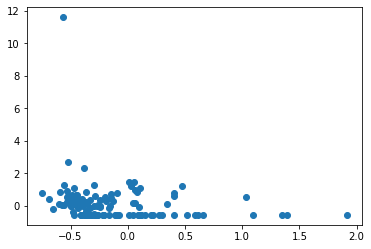

In [158]:
plt.scatter(X_test[:,4],X_test[:,5])

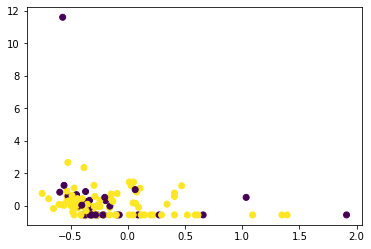

In [159]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,4],X_test[:,5],c = Y_test_transformed) #coloring based on actual values 

# 2. Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
Loan_df = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Loan_df # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [161]:
Loan_df.fit(X_train,Y_train_transformed)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Prediction

In [162]:
y_pred = Loan_df.predict(X_test)

In [163]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [164]:
print (y_pred [0:5])#predicted by the ml model
print (Y_test_transformed [0:5])#actual values we have


[1 1 1 1 1]
[1 0 1 0 1]


In [165]:
Y_test_transformed

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

# Evaluation

In [166]:
from sklearn import metrics
print("DecisionTrees's Accuracy:", metrics.accuracy_score(Y_test_transformed, y_pred))

DecisionTrees's Accuracy: 0.8211382113821138


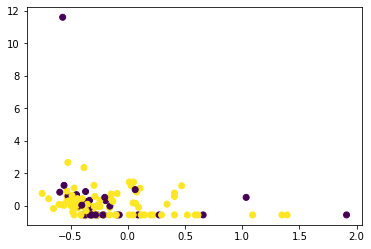

In [167]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,4],X_test[:,5],c = Y_test_transformed)

# 3.SVM

In [168]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train_transformed) # question and answers

SVC(kernel='poly')

In [169]:
yhat = clf.predict(X_test) #question 
yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [170]:
from sklearn.metrics import f1_score
f1_score(Y_test_transformed, yhat, average='weighted') 

0.8180189148830265

In [171]:
from sklearn import svm   
clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train, Y_train_transformed) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(Y_test_transformed, yhat2, average="weighted"))

Avg F1-score: 0.8070


In [172]:
from sklearn import svm   
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, Y_train_transformed) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(Y_test_transformed, yhat2, average="weighted"))

Avg F1-score: 0.8070


# Random Forest

In [173]:
# Fitting the classifier into the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 400, criterion = 'entropy')#5000 decision trees
classifier.fit(X_train,Y_train_transformed)#question,answers (300,2) (300,1)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [174]:
# Predicting the test set results
Y_Pred = classifier.predict(X_test)#examination only question are given

In [175]:
from sklearn.metrics import f1_score
f1_score(Y_test_transformed,Y_Pred)#actual,predict

0.8749999999999999

# Logistic Regression : 90.25%
# Decision Tree       : 82.11%
# SVM                 : 81.80%
# Random Forest       : 88.08%

# Ans : Logistic Regression gives the best possible accuracy that is 90.25%

# Project 2

#ApplyExploratory Data Analysis on the FifaDataset
Convert the appropriate columns to machine understandable columns using label encoding
Handle Null values
Apply the correlation and remove the column which are more than 60% correlated
Apply the variance and remove the columns whose variance is less that 20%
Understand the Dataset whether the dataset is corr

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
Fifa_df = pd.read_excel("C:/Users/Lenovo/Documents/Data Set/Fifa.xlsx")

In [7]:
Fifa_df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [8]:
Fifa_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
Fifa_df.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [10]:
Fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                18207 non-null  int64         
 1   ID                        18207 non-null  int64         
 2   Name                      18207 non-null  object        
 3   Age                       18207 non-null  int64         
 4   Photo                     18207 non-null  object        
 5   Nationality               18207 non-null  object        
 6   Flag                      18207 non-null  object        
 7   Overall                   18207 non-null  int64         
 8   Potential                 18207 non-null  int64         
 9   Club                      17966 non-null  object        
 10  Club Logo                 18207 non-null  object        
 11  Value                     18207 non-null  object        
 12  Wage              

In [11]:
set(Fifa_df["Crossing"])

{nan,
 nan,
 nan,
 nan,
 nan,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

In [12]:
Fifa_df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [13]:
Fifa_df.shape

(18207, 89)

In [14]:
Fifa_df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [15]:
Fifa_df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


# Apply Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder          

In [17]:
le_Height = LabelEncoder()
print(le_Height)
Fifa_df["Height"] = le_Height.fit_transform(Fifa_df["Height"]) 
Fifa_df

le_Weight = LabelEncoder()
print(le_Weight)
Fifa_df["Weight"] = le_Weight.fit_transform(Fifa_df["Weight"]) 
Fifa_df


le_LS = LabelEncoder()
print(le_LS)
Fifa_df["LS"] = le_LS.fit_transform(Fifa_df["LS"]) 
Fifa_df


le_ST = LabelEncoder()
print(le_ST)
Fifa_df["ST"] = le_ST.fit_transform(Fifa_df["ST"]) 
Fifa_df


le_RS = LabelEncoder()
print(le_RS)
Fifa_df["RS"] = le_RS.fit_transform(Fifa_df["RS"]) 
Fifa_df



le_LW = LabelEncoder()
print(le_LW)
Fifa_df["LW"] = le_LW.fit_transform(Fifa_df["LW"]) 
Fifa_df


le_LF = LabelEncoder()
print(le_LF)
Fifa_df["LF"] = le_LF.fit_transform(Fifa_df["LF"]) 
Fifa_df


le_CF = LabelEncoder()
print(le_CF)
Fifa_df["CF"] = le_CF.fit_transform(Fifa_df["CF"]) 
Fifa_df


le_RF = LabelEncoder()
print(le_RF)
Fifa_df["RF"] = le_RF.fit_transform(Fifa_df["RF"]) 
Fifa_df


le_RW = LabelEncoder()
print(le_RW)
Fifa_df["RW"] = le_RW.fit_transform(Fifa_df["RW"]) 
Fifa_df

le_LAM = LabelEncoder()
print(le_LAM)
Fifa_df["LAM"] = le_LAM.fit_transform(Fifa_df["LAM"]) 
Fifa_df


le_CAM = LabelEncoder()
print(le_CAM)
Fifa_df["CAM"] = le_RW.fit_transform(Fifa_df["CAM"]) 
Fifa_df


le_RAM = LabelEncoder()
print(le_RAM)
Fifa_df["RAM"] = le_RAM.fit_transform(Fifa_df["RAM"]) 
Fifa_df

le_LM = LabelEncoder()
print(le_LM)
Fifa_df["LM"] = le_LM.fit_transform(Fifa_df["LM"]) 
Fifa_df

le_LCM = LabelEncoder()
print(le_LCM)
Fifa_df["LCM"] = le_LCM.fit_transform(Fifa_df["LCM"]) 
Fifa_df


le_CM = LabelEncoder()
print(le_CM)
Fifa_df["CM"] = le_CM.fit_transform(Fifa_df["CM"]) 
Fifa_df


le_RCM = LabelEncoder()
print(le_RCM)
Fifa_df["RCM"] = le_RCM.fit_transform(Fifa_df["RCM"]) 
Fifa_df

le_RM = LabelEncoder()
print(le_RM)
Fifa_df["RM"] = le_RM.fit_transform(Fifa_df["RM"]) 
Fifa_df

le_LWB = LabelEncoder()
print(le_LWB)
Fifa_df["LWB"] = le_LWB.fit_transform(Fifa_df["LWB"]) 
Fifa_df

le_LDM= LabelEncoder()
print(le_LDM)
Fifa_df["LDM"] = le_LDM.fit_transform(Fifa_df["LDM"]) 
Fifa_df

le_CDM= LabelEncoder()
print(le_CDM)
Fifa_df["CDM"] = le_CDM.fit_transform(Fifa_df["CDM"]) 
Fifa_df


le_RDM= LabelEncoder()
print(le_RDM)
Fifa_df["RDM"] = le_RDM.fit_transform(Fifa_df["RDM"]) 
Fifa_df

le_RWB= LabelEncoder()
print(le_RWB)
Fifa_df["RWB"] = le_RWB.fit_transform(Fifa_df["RWB"]) 
Fifa_df

le_LB= LabelEncoder()
print(le_LB)
Fifa_df["LB"] = le_LB.fit_transform(Fifa_df["LB"]) 
Fifa_df

le_LCB= LabelEncoder()
print(le_LCB)
Fifa_df["LCB"] = le_LCB.fit_transform(Fifa_df["LCB"]) 
Fifa_df

le_CB= LabelEncoder()
print(le_CB)
Fifa_df["CB"] = le_CB.fit_transform(Fifa_df["CB"]) 
Fifa_df

le_RCB= LabelEncoder()
print(le_RCB)
Fifa_df["RCB"] = le_RCB.fit_transform(Fifa_df["RCB"]) 
Fifa_df

le_RB= LabelEncoder()
print(le_RB)
Fifa_df["RB"] = le_RB.fit_transform(Fifa_df["RB"]) 
Fifa_df


LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [18]:
Fifa_df1 = Fifa_df.drop(["Unnamed: 0","ID","Name","Age","Photo","Nationality","Flag","Club","Club Logo","Value","Wage","Preferred Foot","Work Rate","Body Type","Real Face","Position","Joined","Release Clause","Loaned From","Contract Valid Until","International Reputation","Weak Foot","Skill Moves","Jersey Number"],axis = 1)

In [19]:
Fifa_df1

,Overall,Potential,Special,Height,Weight,LS,ST,RS,LW,LF,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,94,94,2202,8,21,91,91,91,104,101,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94,94,2228,13,32,92,92,92,103,100,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,92,93,2143,10,17,86,86,86,103,99,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,91,93,1471,15,25,93,93,93,105,102,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,91,92,2281,2,19,83,83,83,102,96,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,47,65,1307,10,10,11,11,11,19,17,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,47,63,1098,14,26,14,14,14,13,14,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,47,67,1189,9,16,14,14,14,21,19,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,47,66,1228,1,19,16,16,16,23,19,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [20]:
Fifa_df1.shape

(18207, 65)

In [21]:
Fifa_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall          18207 non-null  int64  
 1   Potential        18207 non-null  int64  
 2   Special          18207 non-null  int64  
 3   Height           18207 non-null  int32  
 4   Weight           18207 non-null  int32  
 5   LS               18207 non-null  int32  
 6   ST               18207 non-null  int32  
 7   RS               18207 non-null  int32  
 8   LW               18207 non-null  int32  
 9   LF               18207 non-null  int32  
 10  CF               18207 non-null  int32  
 11  RF               18207 non-null  int32  
 12  RW               18207 non-null  int32  
 13  LAM              18207 non-null  int32  
 14  CAM              18207 non-null  int32  
 15  RAM              18207 non-null  int32  
 16  LM               18207 non-null  int32  
 17  LCM         

In [22]:
Fifa_df1.columns

Index(['Overall', 'Potential', 'Special', 'Height', 'Weight', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

# Handling the Null Values

In [23]:
Fifa_df2 = Fifa_df1.dropna()
Fifa_df2.isnull().sum()

Overall          0
Potential        0
Special          0
Height           0
Weight           0
                ..
GKDiving         0
GKHandling       0
GKKicking        0
GKPositioning    0
GKReflexes       0
Length: 65, dtype: int64

In [24]:
Fifa_df2.shape

(18159, 65)

In [25]:
Fifa_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall          18159 non-null  int64  
 1   Potential        18159 non-null  int64  
 2   Special          18159 non-null  int64  
 3   Height           18159 non-null  int32  
 4   Weight           18159 non-null  int32  
 5   LS               18159 non-null  int32  
 6   ST               18159 non-null  int32  
 7   RS               18159 non-null  int32  
 8   LW               18159 non-null  int32  
 9   LF               18159 non-null  int32  
 10  CF               18159 non-null  int32  
 11  RF               18159 non-null  int32  
 12  RW               18159 non-null  int32  
 13  LAM              18159 non-null  int32  
 14  CAM              18159 non-null  int32  
 15  RAM              18159 non-null  int32  
 16  LM               18159 non-null  int32  
 17  LCM         

# Apply the correlation and remove the column which are more than 60% correlated

In [26]:
X = Fifa_df2.drop("GKReflexes",axis=1)   #independent variable : all column except Target Dv colun
Y = Fifa_df2["GKReflexes"] #dependent variables only target column will be in Y

In [27]:
X

,Overall,Potential,Special,Height,Weight,LS,ST,RS,LW,LF,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
0,94,94,2202,8,21,91,91,91,104,101,...,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0
1,94,94,2228,13,32,92,92,92,103,100,...,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0
2,92,93,2143,10,17,86,86,86,103,99,...,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0
3,91,93,1471,15,25,93,93,93,105,102,...,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0
4,91,92,2281,2,19,83,83,83,102,96,...,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,47,65,1307,10,10,11,11,11,19,17,...,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0
18203,47,63,1098,14,26,14,14,14,13,14,...,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0
18204,47,67,1189,9,16,14,14,14,21,19,...,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0
18205,47,66,1228,1,19,16,16,16,23,19,...,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0


In [28]:
Y

0         8.0
1        11.0
2        11.0
3        94.0
4        13.0
         ... 
18202     9.0
18203    12.0
18204    13.0
18205     9.0
18206     9.0
Name: GKReflexes, Length: 18159, dtype: float64

In [29]:
X.head()  # Independent Variable

,Overall,Potential,Special,Height,Weight,LS,ST,RS,LW,LF,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
0,94,94,2202,8,21,91,91,91,104,101,...,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0
1,94,94,2228,13,32,92,92,92,103,100,...,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0
2,92,93,2143,10,17,86,86,86,103,99,...,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0
3,91,93,1471,15,25,93,93,93,105,102,...,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0
4,91,92,2281,2,19,83,83,83,102,96,...,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0


In [31]:
X.tail()

,Overall,Potential,Special,Height,Weight,LS,ST,RS,LW,LF,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
18202,47,65,1307,10,10,11,11,11,19,17,...,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0
18203,47,63,1098,14,26,14,14,14,13,14,...,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0
18204,47,67,1189,9,16,14,14,14,21,19,...,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0
18205,47,66,1228,1,19,16,16,16,23,19,...,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0
18206,46,66,1321,1,29,12,12,12,21,17,...,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0


In [30]:
Y.head() # Dependent Variable

0     8.0
1    11.0
2    11.0
3    94.0
4    13.0
Name: GKReflexes, dtype: float64

In [32]:
Y.tail()

18202     9.0
18203    12.0
18204    13.0
18205     9.0
18206     9.0
Name: GKReflexes, dtype: float64

In [33]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=40)

X_train.shape, X_test.shape

((12711, 64), (5448, 64))

In [34]:
X_train

,Overall,Potential,Special,Height,Weight,LS,ST,RS,LW,LF,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
12383,63,65,1732,2,23,34,34,34,56,47,...,69.0,62.0,68.0,50.0,49.0,48.0,14.0,13.0,13.0,11.0
8471,67,67,1739,13,35,28,28,28,40,35,...,52.0,52.0,65.0,61.0,66.0,69.0,11.0,15.0,11.0,6.0
7381,68,68,1746,11,26,32,32,32,48,39,...,54.0,44.0,62.0,63.0,67.0,64.0,7.0,8.0,10.0,16.0
8324,67,67,1541,14,28,50,50,50,44,47,...,53.0,72.0,66.0,31.0,25.0,26.0,15.0,10.0,9.0,13.0
932,77,81,2085,2,34,64,64,64,76,73,...,78.0,66.0,75.0,54.0,66.0,58.0,6.0,6.0,12.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,64,64,1005,11,32,93,93,93,105,102,...,24.0,24.0,52.0,13.0,14.0,13.0,65.0,59.0,56.0,65.0
16113,58,68,1502,11,20,21,21,21,32,26,...,44.0,39.0,47.0,57.0,58.0,52.0,11.0,11.0,13.0,14.0
14549,61,73,1422,11,23,13,13,13,18,14,...,38.0,42.0,54.0,64.0,64.0,62.0,11.0,5.0,13.0,8.0
14603,61,84,1613,9,17,26,26,26,46,39,...,66.0,49.0,64.0,41.0,45.0,47.0,9.0,7.0,9.0,13.0


In [35]:
X_train.corr()

,Overall,Potential,Special,Height,Weight,LS,ST,RS,LW,LF,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
Overall,1.000000,0.663264,0.604935,0.040550,0.165256,0.338139,0.338139,0.338139,0.342771,0.341956,...,0.494140,0.341356,0.730387,0.279500,0.246825,0.217372,-0.024528,-0.022157,-0.028423,-0.014993
Potential,0.663264,1.000000,0.384688,0.021916,0.006314,0.197538,0.197538,0.197538,0.225077,0.220122,...,0.345744,0.228620,0.442075,0.157212,0.140649,0.125848,-0.054595,-0.054619,-0.060127,-0.052443
Special,0.604935,0.384688,1.000000,-0.297463,-0.265904,-0.212012,-0.212012,-0.212012,-0.132986,-0.172172,...,0.759334,0.734896,0.748966,0.558518,0.536126,0.504970,-0.676385,-0.674273,-0.672329,-0.669847
Height,0.040550,0.021916,-0.297463,1.000000,0.445577,0.154700,0.154700,0.154700,0.057627,0.100435,...,-0.277161,-0.263277,-0.096540,-0.081447,-0.075771,-0.080438,0.280936,0.281478,0.277039,0.280326
Weight,0.165256,0.006314,-0.265904,0.445577,1.000000,0.250837,0.250837,0.250837,0.098790,0.159311,...,-0.289806,-0.253409,-0.028103,-0.046479,-0.044360,-0.054441,0.344206,0.343832,0.343493,0.346503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SlidingTackle,0.217372,0.125848,0.504970,-0.080438,-0.054441,-0.583721,-0.583721,-0.583721,-0.534763,-0.558437,...,0.106045,0.066323,0.312186,0.895834,0.974757,1.000000,-0.510227,-0.510690,-0.509268,-0.507307
GKDiving,-0.024528,-0.054595,-0.676385,0.280936,0.344206,0.753361,0.753361,0.753361,0.710469,0.737369,...,-0.380040,-0.621388,-0.371801,-0.552065,-0.531610,-0.510227,1.000000,0.970425,0.965793,0.969970
GKHandling,-0.022157,-0.054619,-0.674273,0.281478,0.343832,0.753712,0.753712,0.753712,0.711088,0.737751,...,-0.376051,-0.621270,-0.368062,-0.552102,-0.531861,-0.510690,0.970425,1.000000,0.965133,0.969720
GKKicking,-0.028423,-0.060127,-0.672329,0.277039,0.343493,0.752924,0.752924,0.752924,0.709590,0.736589,...,-0.373895,-0.616773,-0.367223,-0.548633,-0.530525,-0.509268,0.965793,0.965133,1.000000,0.964452


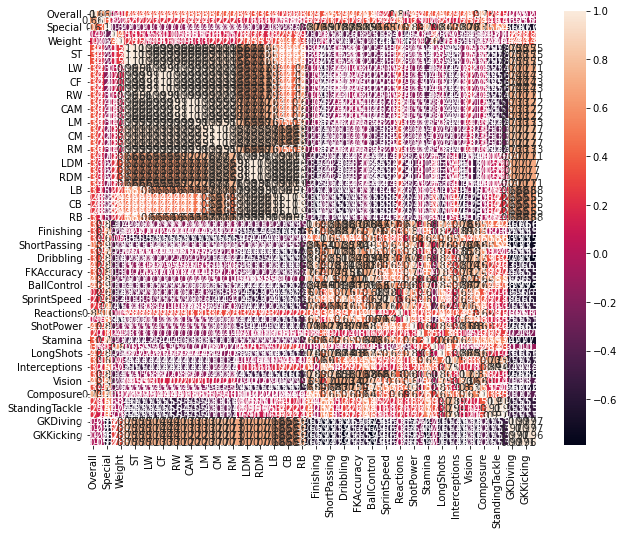

In [36]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [37]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):#X_train,0.6
    col_corr = set()  # Set of all the names of correlated columns
    col_corr_lst = []
    print(f"set initial {col_corr}")
    print(f"list initial {col_corr_lst}")
    corr_arr = dataset.corr() #corr_arr is my correlaion matrix which is 2d
    for row in range(len(corr_arr)):
        for col in range(row): 
            if abs(corr_arr.iloc[row, col]) > threshold: # we are interested in absolute coeff value
                colname = corr_arr.columns[row]  # getting the name of column
                col_corr_lst.append(colname)
                col_corr.add(colname)
                print(f"colname name which is correlated is {colname}")
                print(f"set {col_corr}")
                print(f"lst {col_corr_lst}")


    print(f"list is {col_corr_lst}")
    return col_corr

In [38]:
corr_features = correlation(X_train, 0.6)#data,threshold
len(set(corr_features))

set initial set()
list initial []
colname name which is correlated is Potential
set {'Potential'}
lst ['Potential']
colname name which is correlated is Special
set {'Special', 'Potential'}
lst ['Potential', 'Special']
colname name which is correlated is ST
set {'ST', 'Special', 'Potential'}
lst ['Potential', 'Special', 'ST']
colname name which is correlated is RS
set {'RS', 'ST', 'Special', 'Potential'}
lst ['Potential', 'Special', 'ST', 'RS']
colname name which is correlated is RS
set {'RS', 'ST', 'Special', 'Potential'}
lst ['Potential', 'Special', 'ST', 'RS', 'RS']
colname name which is correlated is LW
set {'Special', 'Potential', 'ST', 'LW', 'RS'}
lst ['Potential', 'Special', 'ST', 'RS', 'RS', 'LW']
colname name which is correlated is LW
set {'Special', 'Potential', 'ST', 'LW', 'RS'}
lst ['Potential', 'Special', 'ST', 'RS', 'RS', 'LW', 'LW']
colname name which is correlated is LW
set {'Special', 'Potential', 'ST', 'LW', 'RS'}
lst ['Potential', 'Special', 'ST', 'RS', 'RS', 'LW', 'L

59

In [39]:
corr_features

{'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'BallControl',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'FKAccuracy',
 'Finishing',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'HeadingAccuracy',
 'Interceptions',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LW',
 'LWB',
 'LongPassing',
 'LongShots',
 'Marking',
 'Penalties',
 'Positioning',
 'Potential',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'Reactions',
 'ST',
 'ShortPassing',
 'ShotPower',
 'SlidingTackle',
 'Special',
 'SprintSpeed',
 'Stamina',
 'StandingTackle',
 'Strength',
 'Vision',
 'Volleys'}

In [40]:
X_train.drop(corr_features,axis=1,inplace = True)
X_test.drop(corr_features,axis=1,inplace = True)

In [41]:
X_train

,Overall,Height,Weight,LS,Jumping
12383,63,2,23,34,69.0
8471,67,13,35,28,76.0
7381,68,11,26,32,75.0
8324,67,14,28,50,82.0
932,77,2,34,64,68.0
...,...,...,...,...,...
11532,64,11,32,93,58.0
16113,58,11,20,21,65.0
14549,61,11,23,13,84.0
14603,61,9,17,26,60.0


In [42]:
X_test

,Overall,Height,Weight,LS,Jumping
12454,63,1,17,32,50.0
10090,65,9,19,36,63.0
15674,59,8,18,34,56.0
14242,61,11,28,30,78.0
2009,75,1,22,50,70.0
...,...,...,...,...,...
2133,74,2,18,50,72.0
799,78,1,19,52,66.0
9474,66,9,16,48,89.0
5484,70,2,28,44,73.0


# Apply the variance and remove the columns whose variance is less that 20%

In [43]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.2)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.2)

In [44]:
#which column is having good variaty of data means good variance
var_thres.get_support()

array([ True,  True,  True,  True,  True])

In [45]:
X_train.columns[var_thres.get_support() == True]

Index(['Overall', 'Height', 'Weight', 'LS', 'Jumping'], dtype='object')

In [46]:
columns_having_var_less_than_20 = X_train.columns[var_thres.get_support() == True]

In [47]:
columns_having_var_less_than_20

Index(['Overall', 'Height', 'Weight', 'LS', 'Jumping'], dtype='object')

In [48]:
X_train.columns[var_thres.get_support() == False] #code to get constant columns

Index([], dtype='object')

In [49]:
constant_columns = X_train.columns[var_thres.get_support() == False] 

In [50]:
constant_columns

Index([], dtype='object')

In [51]:
len(columns_having_var_less_than_20)

5

In [52]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.2)
var_thres.fit(X_test)

VarianceThreshold(threshold=0.2)

In [53]:
#which column is having good variaty of data means good variance
var_thres.get_support()

array([ True,  True,  True,  True,  True])

In [54]:
X_test.columns[var_thres.get_support() == True]

Index(['Overall', 'Height', 'Weight', 'LS', 'Jumping'], dtype='object')

In [55]:
columns_having_var_less_than_20 = X_test.columns[var_thres.get_support() == True]

In [56]:
columns_having_var_less_than_20

Index(['Overall', 'Height', 'Weight', 'LS', 'Jumping'], dtype='object')

In [57]:
X_test.columns[var_thres.get_support() == False] #code to get constant columns

Index([], dtype='object')

In [58]:
constant_columns = X_test.columns[var_thres.get_support() == False] 

In [59]:
constant_columns

Index([], dtype='object')

In [60]:
len(columns_having_var_less_than_20)

5

# Conclusion : The dataset is correlated in that remove the 59 correlated columns and in the variance method none of the column is removed.